In [1]:
import pymysql

# MySQL 연결 설정
connection = pymysql.connect(
    host='192.168.229.131',  # MySQL 서버가 있는 IP
    port=3307,               # 도커에서 매핑한 포트
    user='root',             # MySQL 사용자 이름 (예: root)
    password='1234',         # MySQL 비밀번호
    database='mydb'         # 접속할 데이터베이스
)

try:
    with connection.cursor() as cursor:
        # 1) 새 데이터베이스 my_db 생성
        cursor.execute("CREATE DATABASE IF NOT EXISTS my_db")
        print("데이터베이스 'my_db' 생성 완료")

    # 기존 연결 닫고 새 DB로 다시 연결
    connection.select_db('my_db')

    with connection.cursor() as cursor:
        # 2) 테이블 users_table 생성
        create_table_sql = """
        CREATE TABLE IF NOT EXISTS users_table (
            id INT AUTO_INCREMENT PRIMARY KEY,
            username VARCHAR(255) NOT NULL
        )
        """
        cursor.execute(create_table_sql)
        print("테이블 'users_table' 생성 완료")

        # 3) 데이터 삽입
        insert_sql = "INSERT INTO users_table (username) VALUES (%s)"
        cursor.execute(insert_sql, ('user1',))
        cursor.execute(insert_sql, ('user2',))
        print("데이터 삽입 완료")

    # 커밋 (삽입/생성한 내용 적용)
    connection.commit()

    with connection.cursor() as cursor:
        # 4) 삽입된 데이터 확인
        cursor.execute("SELECT * FROM users_table")
        rows = cursor.fetchall()
        print("users_table 데이터:")
        for row in rows:
            print(row)

finally:
    connection.close()


데이터베이스 'my_db' 생성 완료
테이블 'users_table' 생성 완료
데이터 삽입 완료
users_table 데이터:
(1, 'user1')
(2, 'user2')


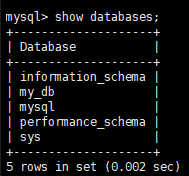

생성완료